In [2]:
import sympy as sy
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

### Quantum Particle in a Triangular Well
The problem of a particle in a triangular well is of particular relevance for the field of Solid State Physics, in the study of semiconducting structures such as high-electron-mobility transistors (HEMTs)

![HEMT Band Structure](./images/HEMT-band_structure_scheme-en.png)

*Figure: Band structure of a High-Electron-Mobility Transistor. Image by [Tschubby](https://commons.wikimedia.org/wiki/User:Tschubby), licensed under [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/).*


We are interested in solving the 1D Schrödinger equation in the GaAs region, whose wavefunction solutions provide the quantized energy levels and spatial distribution of conduction electrons.
Mathematically, the potential profile in this region can be approximated as a triangular well. In the region of interest, we are interested in solving the following Schrödinger Equation:

$\left[ - \frac{\hbar^2}{2m^{*}} \frac{d^2}{dx^2} + eFx\right] \psi(x) = E \psi(x)$

where $m^{*}$ is the effective mass of electrons in GaAs, and F is the electric field strength due to charge transfer. We will find that the solutions are given in terms of Airy functions, which describe the behavior of electrons in a linearly varying potential.

## Mathematical formulation
We consider the Hamiltonian $\hat{\mathcal{H}}$ of a particle confined within inside a triangular potential well. This Hamiltonian is given by

$\hat{\mathcal{H}} = \frac{1}{2 m_e} \hat{p_x}^2 + V(x)$


where the potential is given by

$
V(x) =
\begin{cases}
\infty, & x < 0 \\
eFx, & x \geq 0
\end{cases}
$


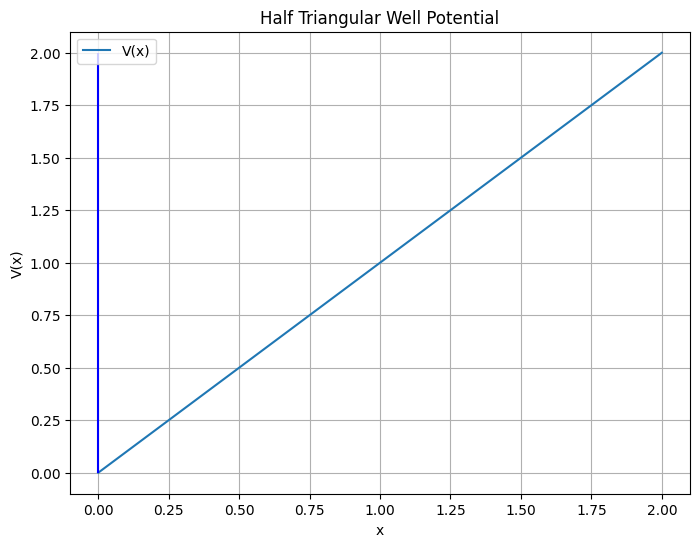

In [5]:
# Illustration of the effective potential in the regions of interest
# region_1 = np.linspace(-2, 0, 50)
region_2 = np.linspace(0, 2, 50)
E = 1  # Electric field strength
V = E * region_2  # Potential profile

# Plot the potential profile
plt.figure(figsize=(8, 6))
# plt.plot(region_1, np.full_like(region_1, 2), label='V(x) = 2')
plt.plot(region_2, V, label='V(x)')
plt.vlines(0, 0, 2, colors='b')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('Half Triangular Well Potential')
plt.legend()
plt.grid(True)
plt.show()

## Analytical solution
In the region of interest $x>0$, we have the following Schrödinger's equation:

$\left[ - \frac{\hbar^2}{2m^{*}} \frac{d^2}{dx^2} + eFx\right] \psi(x) = E \psi(x)$

In order to adimentionalize the problem, we note we have the following dimensional connections between the terms of the Hamiltonian

$ \frac{\hbar^2}{2m{*}} \frac{d^2}{dx^2} \sim \frac{\hbar^2}{2m^{*} x^2}$

$\frac{\hbar^2}{2m^{*} x^2} \sim e F x$

We therefore propose a length scale $x_0$, which we derive from matching both terms in the equality.

$\frac{\hbar^2}{2m^{*} x_{0}^{2}} = e F x_0$

Solving for $x_0$ we find $x_0 = \left( \frac{\hbar^2}{2 m_e e F} \right)^{1/3}$. We then define the adimensional variable $\xi = \frac{x}{x_0}$, which means $x = x_0 \xi$ and therefore our wavefunction reads $\psi(x_0 \xi)$